# Analysing the data from "Chronik flüchtlingsfeindlicher Vorfälle"

## Setup

In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Load the data sets:

In [3]:
df = pd.read_csv('data/mut_gegen_rechte_gewalt_clean.csv')
statistik = pd.read_csv('data/asylmonatszahlen.csv')

## Analysis

### Attacks over time

Prepare the data from the 'Chronik': aggregate by month (setting date as index) and count number of attacks.

In [4]:
df['date'] = pd.to_datetime(df['date'])
df_date = df.resample('M', on='date')[['date']].count()
df_date.index = df_date.index.strftime('%b %Y')
df_date.columns = ['n_attacks']
df_date.head()

,n_attacks
Jan 2015,78
Feb 2015,52
Mar 2015,77
Apr 2015,69
May 2015,76
Jun 2015,51
Jul 2015,125
Aug 2015,197
Sep 2015,163
Oct 2015,297


Prepare the data on monthly number of refugees by formatting it like above.

In [7]:
statistik['date'] = pd.to_datetime(statistik['date'])
statistik = statistik.resample('M', on='date').sum()
statistik.index = statistik.index.strftime('%b %Y')
statistik.columns = ['n_refugees']
statistik.head()

,n_refugees
Jan 2015,25042
Feb 2015,26083
Mar 2015,32054
Apr 2015,27178
May 2015,25992


Merge both data sets:

In [8]:
combined = df_date.merge(statistik, how='left', left_index=True, right_index=True)
combined = combined.dropna()
combined.head()

,n_attacks,n_refugees
Jan 2015,78,25042.0
Feb 2015,52,26083.0
Mar 2015,77,32054.0
Apr 2015,69,27178.0
May 2015,76,25992.0


Finally, we are ready to plot the data:

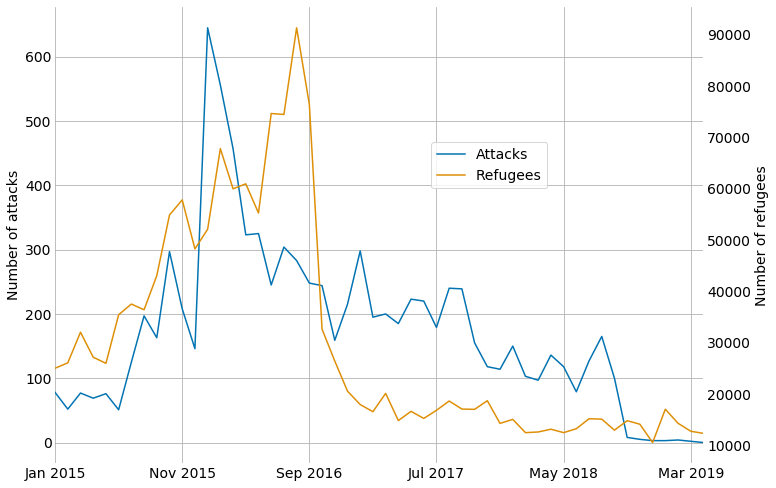

In [30]:
# Set figure and font size
plt.figure(figsize=(11, 7))
plt.rcParams.update({'font.size': 14})
# Define plot
ax1 = combined['n_attacks'].plot(color = '#0173b2')
ax2 = plt.twinx()
combined['n_refugees'].plot(color='#de8f05', ax=ax2)
# Set grid lines
ax1.xaxis.grid(True)
ax1.yaxis.grid(True)
# Set labels
plt.title('')
ax1.set_ylabel('Number of attacks')
ax2.set_ylabel('Number of refugees')
# Turn axis ticks off
ax1.tick_params(axis=u'both', which=u'both',length=0)
ax2.tick_params(axis=u'both', which=u'both',length=0)
# Set legend
ax1.set_label('lkmkl')
legend = ax1.figure.legend(loc='upper right', bbox_to_anchor=(0.7, 0.7))
legend.get_texts()[0].set_text('Attacks')
legend.get_texts()[1].set_text('Refugees')
# Avoid clipping of right y labels
plt.tight_layout()
# Remove frame 
sns.despine(top=True, right=True, left=True, bottom=True);

### Attacks by Bundesland

Group the number of attacks by Bundesland:

In [5]:
df_bundesland = df.groupby('bundesland').size().reset_index(name='n').sort_values('n', ascending=False)
df_bundesland

,bundesland,n
12,Sachsen,1406
1,Bayern,1057
9,Nordrhein-Westfalen,968
3,Brandenburg,930
0,Baden-Württemberg,803
2,Berlin,701
8,Niedersachsen,642
13,Sachsen-Anhalt,539
15,Thüringen,486
14,Schleswig-Holstein,398


Create a variable indicating if a Bundesland is in East or Western Germany (for coloring in plot):

In [6]:
east = ['Brandenburg', 'Sachsen', 'Mecklenburg-Vorpommern', 'Sachsen-Anhalt', 'Thüringen', 'Berlin']
df_bundesland['east_west'] = df_bundesland['bundesland'].apply(lambda x: 'East' if x in east else 'West')
df_bundesland['east_west'].value_counts()

West    10
East     6
Name: east_west, dtype: int64

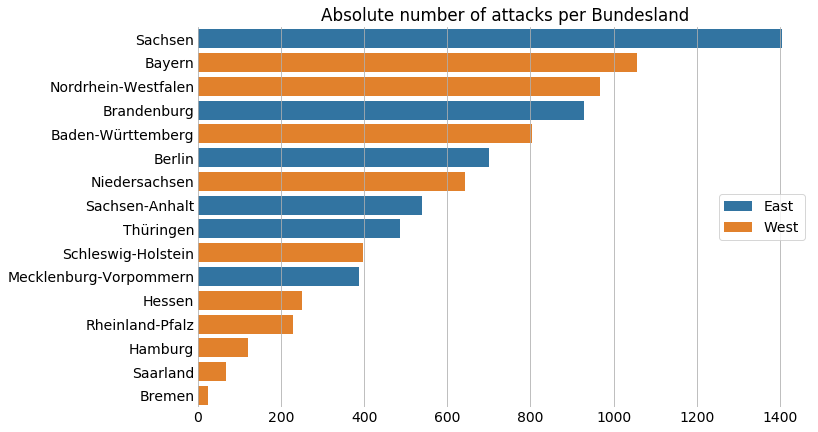

In [7]:
# Set figure and font size
plt.figure(figsize=(11, 7))
plt.rcParams.update({'font.size': 14})
# Define plot
ax = plt.axes()
sns.barplot(x='n', y='bundesland', data=df_bundesland, hue='east_west', dodge=False)
# Set grid lines
ax.xaxis.grid(True)
# Set labels
plt.title('Absolute number of attacks per Bundesland')
plt.xlabel('')
plt.ylabel('')
# Remove legend title
plt.legend(title='')
# Turn axis ticks off
ax.tick_params(axis=u'both', which=u'both',length=0)
# Remove y axis ticks
ax.tick_params(left=False)
# Remove frame 
sns.despine(top=True, right=True, left=True, bottom=True);

### Attacks by Bundesland (standardized by population)

Compute standardized attack rate (100000 attacks per person):

In [8]:
pop_bundesland = df.groupby('population', as_index=False).first()[['bundesland', 'population']]
df_bundesland = df_bundesland.merge(pop_bundesland, on='bundesland', how='left')
df_bundesland['n_std'] = df_bundesland['n'] * 100000 / df_bundesland['population']
df_bundesland = df_bundesland.sort_values('n_std', ascending=False)

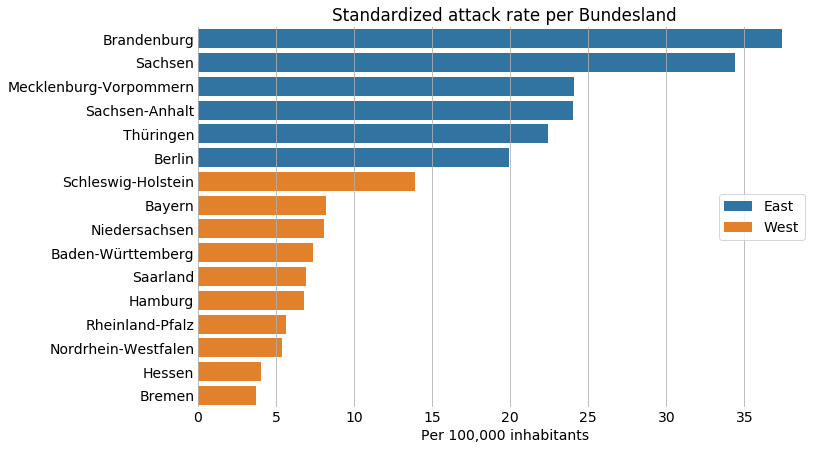

In [9]:
# Set figure and font size
plt.figure(figsize=(11, 7))
plt.rcParams.update({'font.size': 14})
# Define plot
ax = plt.axes()
sns.barplot(x='n_std', y='bundesland', data=df_bundesland, hue='east_west', dodge=False)
# Set grid lines
ax.xaxis.grid(True)
# Set labels
plt.title('Standardized attack rate per Bundesland')
plt.xlabel('Per 100,000 inhabitants')
plt.ylabel('')
# Remove legend title
plt.legend(title='')
# Turn axis ticks off
ax.tick_params(axis=u'both', which=u'both',length=0)
# Remove y axis ticks
ax.tick_params(left=False)
# Remove frame 
sns.despine(top=True, right=True, left=True, bottom=True);

### Attacks by category

In [35]:
df_category = df.groupby('category').size().reset_index(name='n').sort_values('n', ascending=False)
df_category

,category,n
2,Other attacks,6611
1,Assault and battery,1482
3,Rally/demonstration,361
4,Suspected case,286
0,Arson attack,272


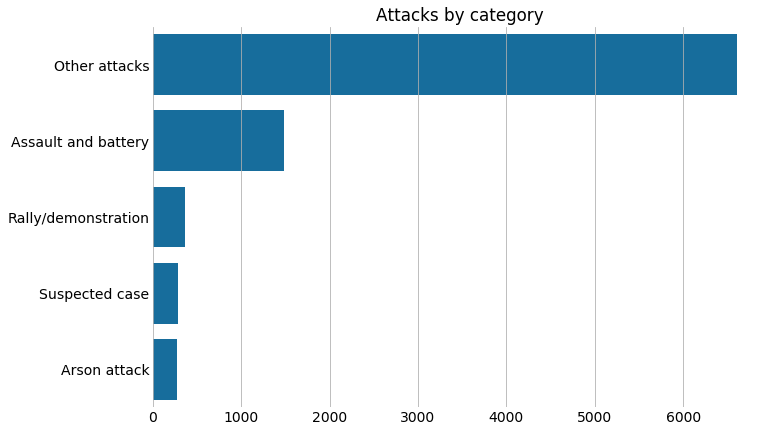

In [36]:
# Set figure and font size
plt.figure(figsize=(11, 7))
plt.rcParams.update({'font.size': 14})
# Define plot
ax = plt.axes()
sns.barplot(x='n', y='category', data=df_category, color='#0173b2')
# Set grid lines
ax.xaxis.grid(True)
# Set labels
plt.title('Attacks by category')
plt.xlabel('')
plt.ylabel('')
# Turn axis ticks off
ax.tick_params(axis=u'both', which=u'both',length=0)
# Remove frame 
sns.despine(top=True, right=True, left=True, bottom=True);

### Number of casualties

Absolute numbers:

In [14]:
df['casualties'].value_counts(dropna=False)

NaN     8401
1.0      473
2.0       88
3.0       27
4.0       12
6.0        3
5.0        3
9.0        1
35.0       1
7.0        1
20.0       1
14.0       1
Name: casualties, dtype: int64

Relative numbers:

In [15]:
df['casualties'].value_counts(normalize=True, dropna=False)

NaN     0.932202
1.0     0.052486
2.0     0.009765
3.0     0.002996
4.0     0.001332
6.0     0.000333
5.0     0.000333
9.0     0.000111
35.0    0.000111
7.0     0.000111
20.0    0.000111
14.0    0.000111
Name: casualties, dtype: float64

By far most of the events do not involve any casualties (more than 90%). In around 5% of the events, 1 Person was injured. There are as well three events, in which more than 10 people suffered from injuries. Let's check which events correspond to the event with the highes number of casualties:

In [16]:
print(*df[df['casualties'] == 35]['description'])

In einer Asylunterkunft in Massow gab es eine Attacke mit Pfefferspray, bei der etwa 35 Asylsuchende Reizungen der Atemwege und Augen erlitten. 14 Menschen mussten im Krankenhaus behandelt werden. Die Polizei nahm einen 28-jährigen Tatverdächtigen fest. Er soll als Bauarbeiter auf dem Gelände der Asylunterkunft gearbeitet haben.

Update: In Königs Wusterhausen musste sich der Angeklagte im Februar 2017 vor Gericht verantworten. Im Prozess gesteht der Angeklagte die als gefährliche Körperverletzung angeklagte Tat, bestreitet aber eine ebenfalls angeklagte Beleidigung. Die Pfeffersprayattacke stellt er als „Spaß“ dar: Er habe nicht gewusst, dass ein lediglich eine Sekunde anhaltendes Sprühen solchen Schaden anrichten könne. Trotz der großen Zahl an Verletzten kann nur ein Mann aus Syrien im Prozess als Nebenkläger auftreten, da der Großteil der anderen Betroffenen in der Zwischenzeit abgeschoben wurde, berichtet Justizwatch. Weiter heißt es im Prozessbericht: "Die Tatschilderung des Nebe